## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [50]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [51]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [53]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [54]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [55]:
#using xor to filter df when one and only of these conditions meet
df[(df['group'] == 'treatment') ^ (df['landing_page'] == 'new_page')]

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
776,820951,2017-01-04 02:42:54.770627,treatment,old_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1


f. Do any of the rows have missing values?

In [56]:
# the total number of null values per column
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [57]:
#dropping the rows using the index of the returned values from the previous operation
df2 = df.drop(df[(df['group'] == 'treatment') ^ (df['landing_page'] == 'new_page')].index)

In [58]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [59]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [60]:
#fetching the duplicated user id
uid = df2[df2.duplicated(subset=['user_id'])]['user_id'].iloc[0]

c. What is the row information for the repeat **user_id**? 

In [61]:
df2[df2['user_id'] == uid]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [62]:
#dropping the second duplicated row
df2.drop_duplicates(subset=['user_id'], inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [63]:
p_conv = df2['converted'].mean()
p_conv

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [64]:
p_conv_gp = df2.groupby('group')['converted'].mean()
p_conv_gp['control']

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [65]:
p_conv_gp['treatment']

0.11880806551510564

d. What is the probability that an individual received the new page?

In [66]:
df2['landing_page'].value_counts(normalize=True)

new_page    0.500062
old_page    0.499938
Name: landing_page, dtype: float64

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.** <br>
Not so far! as the difference is slightly higher than 0, it doesn't mean that there is any statistical significance to say that the new page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.** <br>
$H_0 : P_{new} - P_{old} \leq 0 $ <br>
$H_1 : P_{new} - P_{old} > 0 $ <br><br>
            
i.e : the **null** is that the probability of converting for the new page is ***less than or equal to*** the probability of converting for the old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [67]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [68]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [69]:
n_new = df2.query('group == "treatment"')['converted'].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [70]:
n_old = df2.query('group == "control"')['converted'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [71]:
new_page_converted = df2[df2.group=='treatment']['converted']
new_page_converted.shape

(145310,)

In [72]:
new_page_converted.mean()

0.11880806551510564

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [73]:
old_page_converted = df2[df2.group=='control']['converted']
old_page_converted.shape

(145274,)

In [74]:
old_page_converted.mean()

0.1203863045004612

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [75]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

-0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [76]:
# diffs = []
# for _ in range(10000):
#    new = np.random.choice([1, 0], n_new, p=[p_new, 1-p_new], replace=True)
#    old = np.random.choice([1, 0], n_old, p=[p_old, 1-p_old], replace=True)
#    diffs.append(new.mean() - old.mean())
    
# p_diffs = np.array(diffs)

#since the previous method of bootstraping takes too long to run, using numpy's methods is a better option

new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

In [77]:
p_diffs.shape

(10000,)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

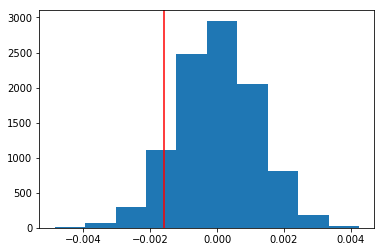

In [78]:
plt.hist(p_diffs);
plt.axvline(obs_diff, color='r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [79]:
(p_diffs > obs_diff).mean()

0.90969999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.** <br>
I just calculated the **p-value**, the probability of the observations' results happening under the null hypothesis, so as the p-value is high, we have no statistical reason to reject the null. <br>
which is that the probability of converting from the new page is less than or equal to the probability of converting for the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [80]:
counts = df2.groupby('group')['converted'].value_counts()
counts

group      converted
control    0            127785
           1             17489
treatment  0            128046
           1             17264
Name: converted, dtype: int64

In [81]:
import statsmodels.api as sm

convert_old = counts.loc[('control', 1)]
convert_new = counts.loc[('treatment', 1)]
n_old = counts['control'].sum()
n_new = counts['treatment'].sum()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [82]:
sm.stats.proportions_ztest([convert_new, convert_old], [ n_new, n_old], alternative='larger')

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.** <br>
they do agree with my previous findings, <br>
the z-score of -1.31 means that the observation is 1.31 standard deviations to the left of the mean (center) of the distribution, <br>
and there, there is a 90% (p-value) chance that happened under the null. <br>
which means that there is no reason to reject the null.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
Logistic Regression, since we are trying to predict only two values, not a continuous value.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [83]:
df2[['new_page', 'old_page']] = pd.get_dummies(df['landing_page'])
df2['ab_page'] = 0
df2.loc[df2['group'] == 'treatment', 'ab_page'] = 1
df2['intercept'] = 1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [84]:
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
res = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

It looks like there's something wrong with the summary function, and it turns out it's due to the use of an outdated function in scipy, <br>
so I found this workaround -implemented in the next cell- here at: https://github.com/statsmodels/statsmodels/issues/3931

In [85]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [86]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        04:15:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.** <br>
As mentioned before, it is because the null hypothesis is different, so is the type of test. <br>
so for the manually constructed test, it the hypotheses are: <br>
$H_0 : p_{new} - p_{old} \leq 0$ <br>
$H_1 : p_{new} - p_{old} > 0 $ <br><br>

As for the model: <br>
$H_0 : p_{new} - p_{old} = 0$ <br>
$H_1 : p_{new} - p_{old} \neq 0$ <br><br>

and $H_1$ could actually be further divided into 2 hypotheses, which would result in: <br>
$H_0 : p_{new} - p_{old} = 0$ <br>
$H_1 : p_{new} - p_{old} < 0$ <br>
$H_2 : p_{new} - p_{old} > 0$ <br><br>

so because it is a two-tailed test, the p-value would decrease as the observation value approaches **either** of the extreme areas of the normal distribution curve, but in our case, we only cared about one tail, one extreme, so as the observation value goes further away from that extreme, the p-value increases, supporting that there is no reason to reject it.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.** <br>
adding more terms might add a little bit of complexity, and there is more room for error there, <br>
but it is absolutely helpful, in case those terms do actually have an effect on our results. <br><br>

so it is indeed a good idea to look at every angle before making a decision.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [87]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [88]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
user_id    290584 non-null int64
country    290584 non-null object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 9 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
new_page        290584 non-null uint8
old_page        290584 non-null uint8
ab_page         290584 non-null int64
intercept       290584 non-null int64
dtypes: int64(4), object(3), uint8(2)
memory usage: 18.3+ MB


In [90]:
df_merged = df2.merge(countries, on='user_id', how='inner')
df_merged.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,1,US


In [91]:
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])

In [92]:
lm_countries = sm.Logit(df_merged['converted'], df_merged[['intercept', 'CA', 'UK']])
res_countries = lm_countries.fit()
res_countries.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:               1.521e-05
Time:                        04:15:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

based on these results here, The country doesn't seem to have any effect on the conversion rate

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [93]:
df_merged['UK_ab_page'] = df_merged['UK'] * df_merged['ab_page']
df_merged['CA_ab_page'] = df_merged['CA'] * df_merged['ab_page']
lm_all = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'CA_ab_page', 'CA', 'UK_ab_page', 'UK']])
res_all = lm_all.fit()
res_all.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:               3.482e-05
Time:                        04:15:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
==============================================================================
"""

after analyzing the interaction between the country and the conversion rate, it still seems that the countries had no impact on the conversion rate whatsoever.

## Conclusion

So as a conclusion, it seems that there is no statistically significant evidence to reject the null. <br>
i.e: there's no reason to change to the new page. <br><br>

**My Decision:** stay with the old page, as it does bring more conversion rates.

In [94]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0